In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from tqdm import tqdm
from PIL import Image
%matplotlib inline     
sns.set(color_codes=True)

# Convert to CSV

In [ ]:
import pickle

with open('data/polyvore/sentence_vector/semantic.pkl', 'rb') as f:
    data = pickle.load(f)

with open('data/polyvore/fashion_items.pickle', 'rb') as f:
    fashion_items = pickle.load(f)

In [ ]:
# len(fashion_items.items())
print(fashion_items['fc29eece94d29722603d0c13b24d8f9ed9068496.jpg'])

In [ ]:
print(len(os.listdir('data/polyvore/images/291x291/')))

In [ ]:
data_dir = "data/polyvore/"

path2images = os.path.join(data_dir, "images", "291x291")
filenames = os.listdir(path2images)
full_filenames = [os.path.join(path2images, filename)
                    for filename in filenames]

In [6]:
df = pd.DataFrame(columns=['image_name', 'semantic_vector', 'text', 'price', 'class', 'categories', 'name'])

for idx, image_fullname in tqdm(enumerate(full_filenames)):
    image_name = os.path.basename(image_fullname)
    obj = {
        'image_name': image_name
    }
    
    if image_name in data:
        obj['semantic_vector'] = data[image_name]
    
    if image_name in fashion_items:
        metadata = fashion_items[image_name]
        
        text = metadata.get("text", "").lower()
        if len(text) > 0:
            obj['text'] = text
        
        price = metadata.get("price", "").lower()
        if len(price) > 0:
            obj['price'] = price
        
        item_class = metadata.get("class", "").lower()
        if len(item_class) > 0:
            obj['class'] = item_class
        
        categories = metadata.get("categories", "")
        if type(categories) == list:
            obj['categories'] = categories
        
        name = metadata.get("name", "").lower()
        if len(name) > 0:
            obj['name'] = name
            
    df.loc[idx] = obj

31815it [03:12, 165.63it/s]


KeyboardInterrupt: 

In [ ]:
df.head()

In [ ]:
df.to_csv("data/csv_files/fashion_hash_net_polyvore.csv")

# EDA

In [2]:
df = pd.read_csv('data/csv_files/fashion_hash_net_polyvore.csv', index_col=0)

In [3]:
df.head()

,image_name,semantic_vector,text,price,class,categories,name
0,00000265469f3a78c8aa403be9fd3e48164ce60d.jpg,[ 0.49362503 0.69441192 -0.10652015 ... -1.33...,black 'babel' skirt from stella mccartney feat...,$560,bottom,"['Shop', 'STELLA McCARTNEY skirts', 'Knee Leng...",stella mccartney 'babel' skirt
1,000019937000419153d38c1ad121cd8212a44d6b.jpg,[ 0.45428534 0.64565642 0.08123788 ... 0.48...,upper: 100% polyurethane. lining: 30% polyeste...,$30,shoe,"['Shop', 'Boots', 'Ankle Booties', 'Zara ankle...",zara high heel peep toe ankle boot
2,0000d33894d75c8839a29a216d9b8e02d1c8c038.jpg,[ 0.74397239 0.8889248 -0.1560354 ... -1.99...,aqua and black snowflake fuzzy jumper,$25,top,"['Shop', 'Quiz sweaters', 'Sweaters', 'Tops']",aqua and black snowflake fuzzy jumper
3,0001b622ca48ea813463bec15f920b0c3328f5d7.jpg,[-0.19374584 -0.22611103 0.92135967 ... 1.20...,black linen henley t-shirt. buttoned placket. ...,$390,top,[],balmain linen henley t-shirt
4,0001ead5bcc80123df2864e48d0009224fbec2bc.jpg,[-0.61890043 0.33185416 0.10417655 ... 0.97...,day birger et mikkelsen night velvet lounge bl...,$138,top,"['Shop', 'DAY Birger et Mikkelsen', 'Clothing'...",day birger et mikkelsen night velvet lounge em...


In [4]:
df.dtypes

image_name         object
semantic_vector    object
text               object
price              object
class              object
categories         object
name               object
dtype: object

In [5]:
df.shape

(293680, 7)

In [6]:
df.count()

image_name         293680
semantic_vector    293680
text               293679
price              281216
class              293680
categories         293680
name               293680
dtype: int64

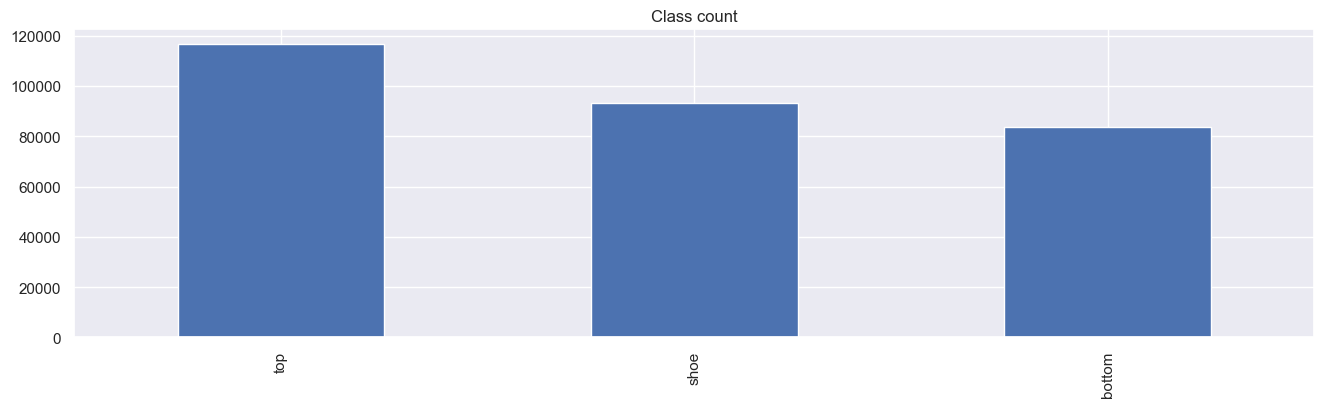

In [7]:
plt.figure(figsize=(16, 4))

df["class"].value_counts(sort=True).plot(kind='bar')
plt.title("Class count")

plt.show()

In [8]:
df.isna().sum()

image_name             0
semantic_vector        0
text                   1
price              12464
class                  0
categories             0
name                   0
dtype: int64

In [9]:
df[df['text'].isna()]

,image_name,semantic_vector,text,price,class,categories,name
254331,dd7d572b8a600be4d91b5d4b3d64f94d84665220.jpg,[ 2.51225503 -0.38514746 -2.42791259 ... -1.68...,NaN,$268,top,"['Shop', 'Tops', 'Preen tops', 'Clothing']",preen polly top
